<a href="https://colab.research.google.com/github/econ105/AI/blob/main/ETFreturn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Sector ETF return analysis

- Downloads historical prices for selected sector ETFs
- Computes daily, cumulative, and annualized returns
- Shows a summary table for comparison

Requirements:
pip install yfinance pandas numpy
"""

import yfinance as yf  # [web:15][web:18]
import pandas as pd
import numpy as np

# -----------------------------
# 1. Parameters
# -----------------------------

# Common US sector ETFs (you can change this list)
SECTOR_ETFS = [
    "XLE",  # Energy
    "XLF",  # Financials
    "XLK",  # Technology
    "XLY",  # Consumer Discretionary
    "XLP",  # Consumer Staples
    "XLI",  # Industrials
    "XLV",  # Health Care
    "XLU",  # Utilities
    "XLRE", # Real Estate
    "XLB",  # Materials
]

START_DATE = "2015-01-01"
END_DATE = None  # None = up to today
RISK_FREE_RATE = 0.0  # set to e.g. 0.02 for 2% if you want Sharpe vs risk‑free

# -----------------------------
# 2. Download price data
# -----------------------------

data = yf.download(
    tickers=SECTOR_ETFS,
    start=START_DATE,
    end=END_DATE,
    interval="1d",
    auto_adjust=True,
    progress=False,
)["Close"]  # use adjusted close prices [web:15][web:18]

# Ensure columns are only tickers (no MultiIndex)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

# Drop days with all NaNs
data = data.dropna(how="all")

# -----------------------------
# 3. Compute returns
# -----------------------------

# Simple daily returns [web:19]
daily_returns = data.pct_change().dropna()

# Cumulative returns (growth of 1) [web:16]
cum_growth = (1 + daily_returns).cumprod()
cum_return = cum_growth.iloc[-1] - 1  # total return over period [web:16]

# Annualized metrics (assuming 252 trading days per year) [web:13][web:16]
trading_days_per_year = 252

annualized_return = (1 + daily_returns.mean()) ** trading_days_per_year - 1
annualized_vol = daily_returns.std() * np.sqrt(trading_days_per_year)

# Simple Sharpe ratio vs risk‑free [web:13]
excess_daily = daily_returns - (RISK_FREE_RATE / trading_days_per_year)
sharpe = (excess_daily.mean() / excess_daily.std()) * np.sqrt(trading_days_per_year)

# -----------------------------
# 4. Summary table
# -----------------------------

summary = pd.DataFrame({
    "Total Return (%)": (cum_return * 100).round(2),
    "Annualized Return (%)": (annualized_return * 100).round(2),
    "Annualized Volatility (%)": (annualized_vol * 100).round(2),
    "Sharpe Ratio": sharpe.round(2),
})

summary = summary.sort_values("Annualized Return (%)", ascending=False)

print("Sector ETF return summary:")
print(summary)

# -----------------------------
# 5. Optional: save to CSV
# -----------------------------

summary.to_csv("sector_etf_return_summary.csv")
daily_returns.to_csv("sector_etf_daily_returns.csv")
cum_growth.to_csv("sector_etf_cum_growth.csv")



Sector ETF return summary:
        Total Return (%)  Annualized Return (%)  Annualized Volatility (%)  \
Ticker                                                                       
XLK               690.32                  25.90                      24.06   
XLI               270.84                  15.86                      19.77   
XLY               254.73                  15.86                      21.82   
XLF               238.59                  15.43                      22.20   
XLB               178.42                  12.88                      20.69   
XLE               114.74                  12.62                      29.70   
XLU               168.82                  12.14                      19.09   
XLV               174.17                  11.87                      16.65   
XLP               121.04                   9.20                      14.63   
XLRE               94.71                   8.99                      20.49   

        Sharpe Ratio  
Ticker       

In [3]:
"""
Real estate ETF return analysis

- Downloads historical prices for selected real estate ETFs
- Computes daily, cumulative, and annualized returns
- Calculates a simple Sharpe ratio
- Saves results to CSV

Requirements:
pip install yfinance pandas numpy
"""

import yfinance as yf
import pandas as pd
import numpy as np

# -----------------------------
# 1. Parameters
# -----------------------------

REAL_ESTATE_ETFS = [
    "VNQ",   # Vanguard Real Estate ETF
    "IYR",   # iShares U.S. Real Estate ETF
    "SCHH",  # Schwab U.S. REIT ETF
    "XLRE",  # Real Estate Select Sector SPDR Fund
]

START_DATE = "2010-01-01"
END_DATE = None          # None = up to today
RISK_FREE_RATE = 0.0     # e.g. 0.02 for 2% if you want Sharpe vs risk‑free

# -----------------------------
# 2. Download price data
# -----------------------------

data = yf.download(
    tickers=REAL_ESTATE_ETFS,
    start=START_DATE,
    end=END_DATE,
    interval="1d",
    auto_adjust=True,
    progress=False,
)["Close"]

# Handle possible MultiIndex columns (older yfinance versions)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

# Drop days with all NaNs
data = data.dropna(how="all")

# -----------------------------
# 3. Compute returns
# -----------------------------

# Daily simple returns
daily_returns = data.pct_change().dropna()

# Cumulative growth of 1
cum_growth = (1 + daily_returns).cumprod()
cum_return = cum_growth.iloc[-1] - 1   # total return over period

# Annualized metrics (assuming 252 trading days per year)
trading_days_per_year = 252

annualized_return = (1 + daily_returns.mean()) ** trading_days_per_year - 1
annualized_vol = daily_returns.std() * np.sqrt(trading_days_per_year)

# Simple Sharpe ratio vs risk‑free
excess_daily = daily_returns - (RISK_FREE_RATE / trading_days_per_year)
sharpe = (excess_daily.mean() / excess_daily.std()) * np.sqrt(trading_days_per_year)

# -----------------------------
# 4. Summary table
# -----------------------------

summary = pd.DataFrame({
    "Total Return (%)": (cum_return * 100).round(2),
    "Annualized Return (%)": (annualized_return * 100).round(2),
    "Annualized Volatility (%)": (annualized_vol * 100).round(2),
    "Sharpe Ratio": sharpe.round(2),
})

summary = summary.sort_values("Annualized Return (%)", ascending=False)

print("Real estate ETF return summary:")
print(summary)

# -----------------------------
# 5. Optional: save to CSV
# -----------------------------

summary.to_csv("re_etf_return_summary.csv")
daily_returns.to_csv("re_etf_daily_returns.csv")
cum_growth.to_csv("re_etf_cum_growth.csv")


Real estate ETF return summary:
        Total Return (%)  Annualized Return (%)  Annualized Volatility (%)  \
Ticker                                                                       
XLRE               94.71                   8.99                      20.49   
IYR                77.58                   7.97                      20.28   
VNQ                72.61                   7.77                      20.69   
SCHH               46.11                   6.10                      20.96   

        Sharpe Ratio  
Ticker                
XLRE            0.42  
IYR             0.38  
VNQ             0.36  
SCHH            0.28  


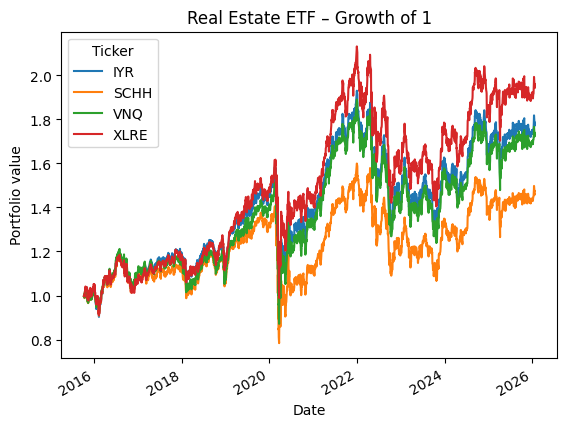

In [4]:
import matplotlib.pyplot as plt

cum_growth.plot(title="Real Estate ETF – Growth of 1")
plt.ylabel("Portfolio value")
plt.show()
